# Handling Outliers — Detection, Understanding & Treatment

**Objective**: Learn how to **detect**, **visualize**, and **handle outliers** using **5-number summary**, **IQR method**, and **box plots**.

---

## 1. What Are Outliers?

> **Outlier**: A data point that differs **significantly** from other observations.

**Types**:
- **True Outliers**: Real anomalies (e.g., fraud, sensor error)
- **False Outliers**: Data entry errors, extreme but valid values

**Impact on ML**:
- Skew **mean** and **standard deviation**
- Hurt **linear models**, **distance-based algorithms** (KNN, SVM)
- Mislead **scaling** and **feature importance**

---

## 2. The 5-Number Summary

For a dataset, compute:

| Statistic | Definition |
|---------|-----------|
| **Minimum** | Smallest value |
| **Q1 (25th percentile)** | Lower quartile |
| **Median (Q2)** | Middle value |
| **Q3 (75th percentile)** | Upper quartile |
| **Maximum** | Largest value |

**IQR (Interquartile Range)** = $ Q3 - Q1 $

> **IQR is robust** — not affected by extreme values.

## 3. IQR Method for Outlier Detection (Tukey’s Rule)

Define bounds:

$$
\text{Lower Fence} = Q1 - 1.5 \times IQR \\
\text{Upper Fence} = Q3 + 1.5 \times IQR
$$

> Any point **outside** these fences → **Outlier**

**Why 1.5?** Covers ~99.3% of data in a normal distribution.

## 4. Example 1: Clean Data (No Outliers)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample marks (valid range: 0–100)
lst_marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]

# Compute 5-number summary
minimum, Q1, median, Q3, maximum = np.quantile(lst_marks, [0, 0.25, 0.50, 0.75, 1.0])

print(f"Minimum: {minimum}")
print(f"Q1: {Q1}")
print(f"Median: {median}")
print(f"Q3: {Q3}")
print(f"Maximum: {maximum}")

Minimum: 32.0
Q1: 54.0
Median: 67.0
Q3: 89.0
Maximum: 99.0


In [2]:
# Compute IQR and fences
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"\nIQR: {IQR}")
print(f"Lower Fence: {lower_fence:.2f}")
print(f"Upper Fence: {upper_fence:.2f}")

# Check for outliers
outliers = [x for x in lst_marks if x < lower_fence or x > upper_fence]
print(f"Outliers: {outliers}")  # Should be empty


IQR: 35.0
Lower Fence: 1.50
Upper Fence: 141.50
Outliers: []


## 5. Visualize with Box Plot

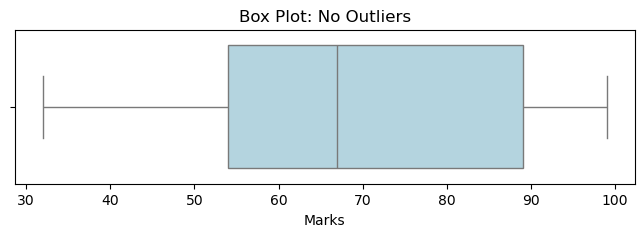

In [3]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=lst_marks, color='lightblue')
plt.title('Box Plot: No Outliers')
plt.xlabel('Marks')
plt.show()

> **All points inside fences** → No outliers

## 6. Example 2: Data with Outliers

In [4]:
# Add extreme values
lst_marks_with_outliers = [-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 150, 170, 180]

# Recompute summary
minimum2, Q1_2, median2, Q3_2, maximum2 = np.quantile(lst_marks_with_outliers, [0, 0.25, 0.50, 0.75, 1.0])
IQR2 = Q3_2 - Q1_2
lower_fence2 = Q1_2 - 1.5 * IQR2
upper_fence2 = Q3_2 + 1.5 * IQR2

print(f"IQR: {IQR2}")
print(f"Lower Fence: {lower_fence2:.2f}")
print(f"Upper Fence: {upper_fence2:.2f}")

# Detect outliers
outliers2 = [x for x in lst_marks_with_outliers if x < lower_fence2 or x > upper_fence2]
print(f"Detected Outliers: {outliers2}")

IQR: 42.5
Lower Fence: -16.50
Upper Fence: 153.50
Detected Outliers: [-100, -200, 170, 180]


## 7. Visualize Outliers

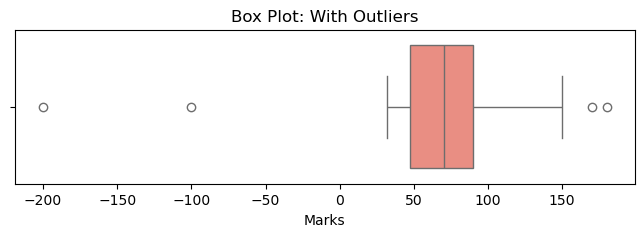

In [5]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=lst_marks_with_outliers, color='salmon')
plt.title('Box Plot: With Outliers')
plt.xlabel('Marks')
plt.show()

> **Circles outside whiskers** = Outliers detected by IQR method

## 8. Outlier Treatment Options

| Method | When to Use | Code Example |
|-------|-------------|------------|
| **Remove** | If outliers are errors | `df = df[(df['col'] >= lower) & (df['col'] <= upper)]` |
| **Cap (Winsorize)** | Preserve count | `df['col'] = np.clip(df['col'], lower, upper)` |
| **Impute** | If meaningful | Replace with median |
| **Keep** | If real signal | Use robust models (Tree-based) |

**Example: Cap outliers**

In [6]:
import pandas as pd

df = pd.DataFrame({'marks': lst_marks_with_outliers})

# Cap values at fences
df_capped = df.copy()
df_capped['marks'] = np.clip(df_capped['marks'], lower_fence2, upper_fence2)

print("Original vs Capped:")
print(pd.concat([df['marks'], df_capped['marks']], axis=1).head(10))

Original vs Capped:
   marks  marks
0   -100  -16.5
1   -200  -16.5
2     45   45.0
3     32   32.0
4     56   56.0
5     75   75.0
6     89   89.0
7     54   54.0
8     32   32.0
9     89   89.0


## 9. When to Use IQR vs Z-Score

| Method | Best For | Robust to Skew? |
|-------|----------|-----------------|
| **IQR (1.5 rule)** | Skewed data | Yes |
| **Z-Score (>3)** | Normal data | No |

> **Always prefer IQR** for real-world data

## 10. Key Takeaways

| Point | Insight |
|------|--------|
| **Use 5-number summary** | To understand spread |
| **IQR is robust** | Ignores extreme values |
| **Box plot = best visual** | Instantly spot outliers |
| **1.5 × IQR rule** | Standard for detection |
| **Treat, don’t always delete** | Preserve information |

---
**End of Notebook**